# Numerically Solving ODEs

The full method is discussed in the notes, so I'll just recap.  We started with the differential equation
$$
\frac{d^2 \phi}{dt^2} = -\omega^2 \sin(\phi),
$$
which we first turned into two first order differential equations:
$$
\frac{d\phi}{dt} = \psi  \quad \text{and} \quad \frac{d\psi}{dt} = -\omega^2 \sin(\phi).
$$

Euler's method begins with treating the differential changes as finite (but small) differences:
$$
\Delta \phi = \psi \Delta t \quad \text{and} \quad \Delta \psi = -\omega^2 \sin(\phi) \Delta t.
$$

Then after the $i$th timestep, the angle and its derivative are at
$$
\phi_i = \phi_{i-1}  + \psi_{i-1} \Delta t
$$
and
$$
\psi_i = \psi_{i-1} - \omega^2 \sin(\phi_{i-1}) \Delta t.
$$

The best way to program this up is to use NumPy arrays and MatPlotLib for plotting the result.  Here's how I do that.

Text(0, 0.5, '$\\phi$ (degrees)')

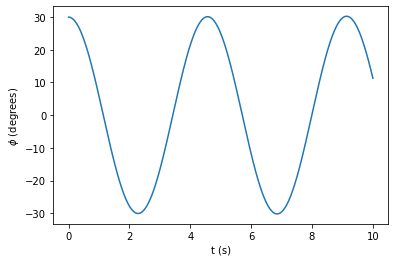

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define our variables first

omega = np.sqrt(9.8 / 5.0)  # that's sqrt(g/R)

dt = 0.001  # this is the timestep
t = np.arange(0, 10, dt)  # we'll go until 10 seconds

# create arrays to hold phi and psi
N = len(t)
phi = np.zeros(N)
psi = np.zeros(N)

# set initial conditions
phi[0] = np.pi/6.0   # 30 degrees
psi[0] = 0.0   # starts from rest

# Start moving forward in time
for i in range(1, N):
    phi[i] = phi[i-1] + psi[i-1] * dt
    psi[i] = psi[i-1] - omega**2 * np.sin(phi[i-1]) * dt
    
# plot up phi (covert phi to degrees, too)
plt.plot(t, phi / np.pi * 180)
plt.xlabel("t (s)")
plt.ylabel("$\phi$ (degrees)")

This shows a plot of the data produces by numerically integrating the differential equations, and you can see that the skateboard goes back and forth.